**Data analysis**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
def load_and_combine_data(directory_non_adaptive, directory_adaptive):
    #Data prep: non-adaptive
    csv_files_non_adapt = [file for file in os.listdir(directory_non_adaptive) if file.endswith('.csv')]

    combined_no_adapt_df = pd.DataFrame()

    for run_number, file in enumerate(csv_files_non_adapt, start=1):
        file_path = os.path.join(directory_non_adaptive, file)
        df = pd.read_csv(file_path)
        df.columns = [f"{col}, run {run_number}" for col in df.columns]
        combined_no_adapt_df = pd.concat([combined_no_adapt_df, df], axis=1) # Horizontal concatenation


    #Data prep: self-adaptive
    csv_files_adaptive = [file for file in os.listdir(directory_adaptive) if file.endswith('.csv')]

    combined_adapt_df = pd.DataFrame()

    for run_number, file in enumerate(csv_files_adaptive, start=1):
        file_path = os.path.join(directory_adaptive, file)
        df = pd.read_csv(file_path)
        df.columns = [f"{col}, run {run_number}" for col in df.columns]
        combined_adapt_df = pd.concat([combined_adapt_df, df], axis=1) # Horizontal concatenation
        
    return combined_no_adapt_df, combined_adapt_df

In [3]:
def calculate_aggregates_mean_std(combined_no_adapt_df, combined_adapt_df):
    #Calculate aggregates: non-adaptive
    filtered_columns = [col for col in combined_no_adapt_df.columns if col.startswith('Mean fitness')]
    combined_no_adapt_df['Avg of mean fitness (all runs)'] = combined_no_adapt_df[filtered_columns].mean(axis=1)
    combined_no_adapt_df['Std of mean fitness (all runs)'] = combined_no_adapt_df[filtered_columns].std(axis=1)

    filtered_columns = [col for col in combined_no_adapt_df.columns if col.startswith('Best fitness')]
    combined_no_adapt_df['Avg of best fitness (all runs)'] = combined_no_adapt_df[filtered_columns].mean(axis=1)
    combined_no_adapt_df['Std of best fitness (all runs)'] = combined_no_adapt_df[filtered_columns].std(axis=1)


    #Calculate aggregates: self-adaptive
    filtered_columns = [col for col in combined_adapt_df.columns if col.startswith('Mean fitness')]
    combined_adapt_df['Avg of mean fitness (all runs)'] = combined_adapt_df[filtered_columns].mean(axis=1)
    combined_adapt_df['Std of mean fitness (all runs)'] = combined_adapt_df[filtered_columns].std(axis=1)

    filtered_columns = [col for col in combined_adapt_df.columns if col.startswith('Best fitness')]
    combined_adapt_df['Avg of best fitness (all runs)'] = combined_adapt_df[filtered_columns].mean(axis=1)
    combined_adapt_df['Std of best fitness (all runs)'] = combined_adapt_df[filtered_columns].std(axis=1)
    
    return combined_no_adapt_df, combined_adapt_df

In [4]:
def plot_fitness(combined_no_adapt_df, combined_adapt_df, enemy_name):
    plt.rc('font', size=12)
    fig, ax = plt.subplots()
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title(f'Performance of nonuniform mutation strategy vs.\nself-adaptive strategy against {enemy_name}')


    #Mean fitness: non-adaptive
    x1 = combined_no_adapt_df.index
    y1 = combined_no_adapt_df['Avg of mean fitness (all runs)']
    std1 = combined_no_adapt_df['Std of mean fitness (all runs)'] 

    ax.plot(x1, y1, color = 'darkblue', label='Mean Fitness: Alg. 1 (nonuniform mutation)')
    ax.fill_between(x1, 
                     y1 - std1,
                     y1 + std1,
                    color = 'lightblue',
                     alpha=0.2)


    #Best fitness: non-adaptive
    x2 = combined_no_adapt_df.index
    y2 = combined_no_adapt_df['Avg of best fitness (all runs)']
    std2 = combined_no_adapt_df['Std of best fitness (all runs)']
    ax.plot(x2, y2, color = 'darkblue', label='Best Fitness: Alg. 1 (nonuniform mutation)')
    ax.fill_between(x2, 
                     y2 - std2,
                     y2 + std2,
                    color = 'lightblue',
                    alpha=0.2)

    #Mean fitness: self-adaptive
    x3 = combined_adapt_df.index
    y3 = combined_adapt_df['Avg of mean fitness (all runs)']
    std3 = combined_adapt_df['Std of mean fitness (all runs)'] 

    ax.plot(x3, y3, color = 'darkred', label='Mean Fitness: Alg. 2 (self-adaptive mutation)')
    ax.fill_between(x3, 
                     y3 - std3,
                     y3 + std3,
                    color = 'pink',
                     alpha=0.2)


    #Best fitness: self-adaptive
    x4 = combined_adapt_df.index
    y4 = combined_adapt_df['Avg of best fitness (all runs)']
    std4 = combined_adapt_df['Std of best fitness (all runs)']
    ax.plot(x4, y4, color = 'darkred', label='Best Fitness: Alg. 2 (self-adaptive mutation)')
    ax.fill_between(x4, 
                     y4 - std4,
                     y4 + std4,
                    color = 'pink',
                    alpha=0.2)


    ax.set_xticks(range(0, 21, 5))
    ax.set_ylim(0, 100)
    ax.legend(fontsize = 'x-small')
    
    #save
    plot_name = f'fitness_{enemy_name}'
    plt.savefig(plot_name, dpi = 300)

In [5]:
#Function extracts maximum fitness of every run
def get_boxplot_values(data_frame):
    best_fitness_columns = [col for col in data_frame.columns if col.startswith('Best fitness')]
    max_values = []

    for col in best_fitness_columns:
        max_value = data_frame[col].max()
        max_values.append(max_value)
    
    return max_values

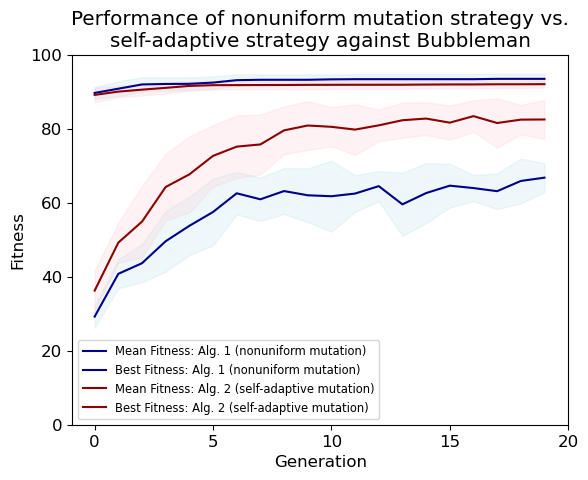

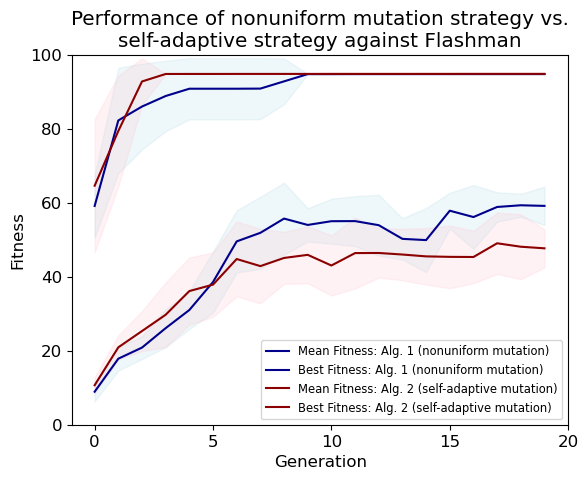

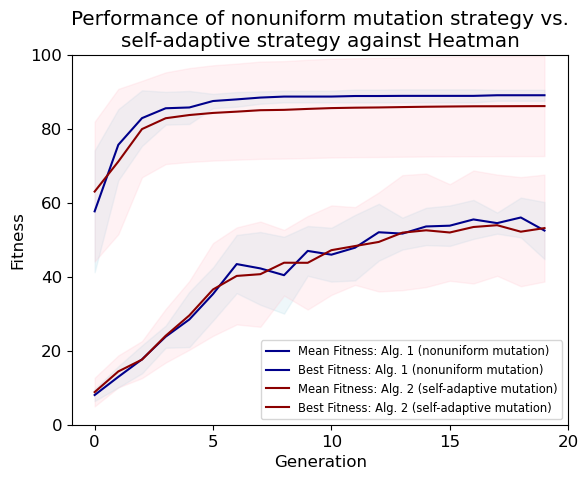

In [6]:
# Create line plots
directories_non_adaptive = ['Waterman_no_self_adapt(actuallyBubbleman)', 'Flashman_no_self_adapt', 'Heatman_no_self_adapt']
directories_adaptive = ['Waterman_self_adapt(actuallyBubbleman)', 'FlashMan_self_adapt', 'Heatman_self_adapt']
enemies = ['Bubbleman', 'Flashman', 'Heatman']

for i in range(len(enemies)):
    combined_no_adapt_df, combined_adapt_df = load_and_combine_data(directories_non_adaptive[i], directories_adaptive[i])
    combined_no_adapt_df, combined_adapt_df = calculate_aggregates_mean_std(combined_no_adapt_df, combined_adapt_df)
    plot_fitness(combined_no_adapt_df, combined_adapt_df, enemies[i])

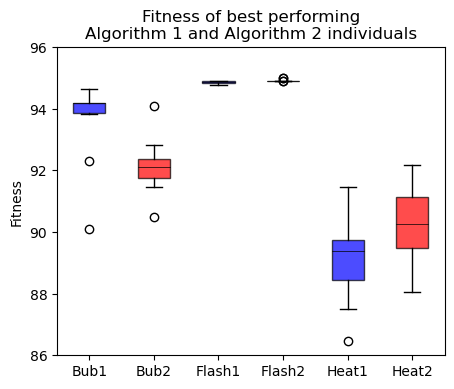

In [10]:
#Create box plot
directories_non_adaptive = ['Waterman_no_self_adapt(actuallyBubbleman)', 'Flashman_no_self_adapt', 'Heatman_no_self_adapt']
directories_adaptive = ['Waterman_self_adapt(actuallyBubbleman)', 'FlashMan_self_adapt', 'Heatman_self_adapt']

fig, ax = plt.subplots(figsize=(5, 4))
plt.rc('font', size=10)

datasets = []

for i in range(len(enemies)):
    combined_no_adapt_df, combined_adapt_df = load_and_combine_data(directories_non_adaptive[i], directories_adaptive[i])
    datasets.append(get_boxplot_values(combined_no_adapt_df))
    datasets.append(get_boxplot_values(combined_adapt_df))

boxplot_colors = ['blue', 'red', 'blue', 'red', 'blue', 'red']

bp = ax.boxplot(datasets, patch_artist=True, medianprops={'color': 'black', 'linewidth': 0.5})

for box, color in zip(bp['boxes'], boxplot_colors):
    box.set(facecolor=color, alpha=0.7)

ax.set_ylim(86, 96)
ax.set_xticklabels(['Bub1', 'Bub2', 'Flash1', 'Flash2', 'Heat1', 'Heat2'])
ax.set_ylabel('Fitness')
ax.set_title('Fitness of best performing\nAlgorithm 1 and Algorithm 2 individuals')

plt.savefig('boxplot')


#Get top performing individual fitness for each enemy and each algorithm
best_of_best = [max(i) for i in datasets]

In [8]:
for i in range(len(enemies)):
    _, combined_adapt_df = load_and_combine_data(directories_non_adaptive[i], directories_adaptive[i])
    sigma_start = combined_adapt_df.loc[0, combined_adapt_df.columns[combined_adapt_df.columns.str.startswith('Average sigma start')]].tolist()
    sigma_end = combined_adapt_df.loc[0, combined_adapt_df.columns[combined_adapt_df.columns.str.startswith('Average sigma end')]].tolist()
    print(f'sigma start is {sum(sigma_start)/len(sigma_start):.3f} and sigma end is {sum(sigma_end)/len(sigma_end):.3f} for {enemies[i]}')

sigma start is 0.056 and sigma end is 0.032 for Bubbleman
sigma start is 0.055 and sigma end is 0.030 for Flashman
sigma start is 0.055 and sigma end is 0.036 for Heatman
